We have 24 columns out of which 'name' is labeled data.
'status' is the output.
0 --> Healthy patient
1-->Parkinson's patient

MDVP:Fo(Hz): Fundamental frequency (average), measured in Hertz (Hz). It represents the average vocal fold vibration rate during sustained phonation.

MDVP:Fhi(Hz): Maximum fundamental frequency, measured in Hertz (Hz). It represents the highest frequency of vocal fold vibration during sustained phonation.

MDVP:Flo(Hz): Minimum fundamental frequency, measured in Hertz (Hz). It represents the lowest frequency of vocal fold vibration during sustained phonation.

MDVP:Jitter(%): Variation in fundamental frequency, measured as a percentage. It quantifies the cycle-to-cycle variation in vocal fold vibration, which is related to the perceived hoarseness or instability in the voice.

MDVP:Jitter(Abs): Absolute jitter, measured in milliseconds (ms). It represents the absolute difference in consecutive periods of fundamental frequency.

MDVP:RAP: Relative average perturbation, measured in milliseconds (ms). It is another measure of cycle-to-cycle variation in vocal fold vibration.

MDVP:PPQ: Five-point period perturbation quotient. It is similar to jitter but calculated differently.

Jitter:DDP: Jitter (difference, difference, and peak), measured in milliseconds (ms). It is another measure of variation in vocal fold vibration.

MDVP:Shimmer: Variation in amplitude of consecutive periods of vocal fold vibration. It represents the cycle-to-cycle variation in the amplitude of the voice signal.

... (and other similar columns): These columns likely represent additional measures related to shimmer, such as different calculations or variations in amplitude variation.

Shimmer:DDA: Shimmer (difference, difference, and peak), measured in decibels (dB). It is another measure of variation in the amplitude of the voice signal.

NHR: Noise-to-harmonics ratio. It represents the ratio of noise to tonal components in the voice signal.

HNR: Harmonics-to-noise ratio. It represents the ratio of tonal components to noise in the voice signal.

status: This column typically indicates the presence or absence of Parkinson's disease in the individual. It is a binary label, where 1 may indicate the presence of Parkinson's disease and 0 may indicate its absence.

RPDE: Recurrence period density entropy. It is a measure related to the dynamics of the voice signal.

DFA: Detrended fluctuation analysis. It is another measure related to the dynamics of the voice signal.

spread1: Another measure related to the dynamics of the voice signal.

spread2: Another measure related to the dynamics of the voice signal.

D2: Correlation dimension. It is a measure of the complexity of the voice signal.

PPE: Pitch period entropy. It is a measure related to the periodicity of the voice signal.

In [56]:
#Importing all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [57]:
#Loading into dataframe
parkinson_dataset = pd.read_csv(r"parkinsons.csv")

##Exploratory Data analysis

In [58]:
# printing the first 5 rows(default) of the dataset
parkinson_dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [59]:
# number of rows and Columns in this dataset
parkinson_dataset.shape

(195, 24)

In [60]:
#the count of null values each column
parkinson_dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [61]:
#count of duplicated values in the dataset
parkinson_dataset.duplicated().sum()

0

In [62]:
# information about dataset
parkinson_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [63]:
#Gives the statictical description on all numerical columns
parkinson_dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Calculate the correlation matrix

In [64]:
# Assuming 'parkinson_dataset' is your DataFrame containing the dataset
parkinson_dataset.drop(columns=['name'], inplace=True)  # Drop the 'name' column
correlation = parkinson_dataset.corr()
print(correlation['status'].sort_values(ascending=False), '\n')

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64 



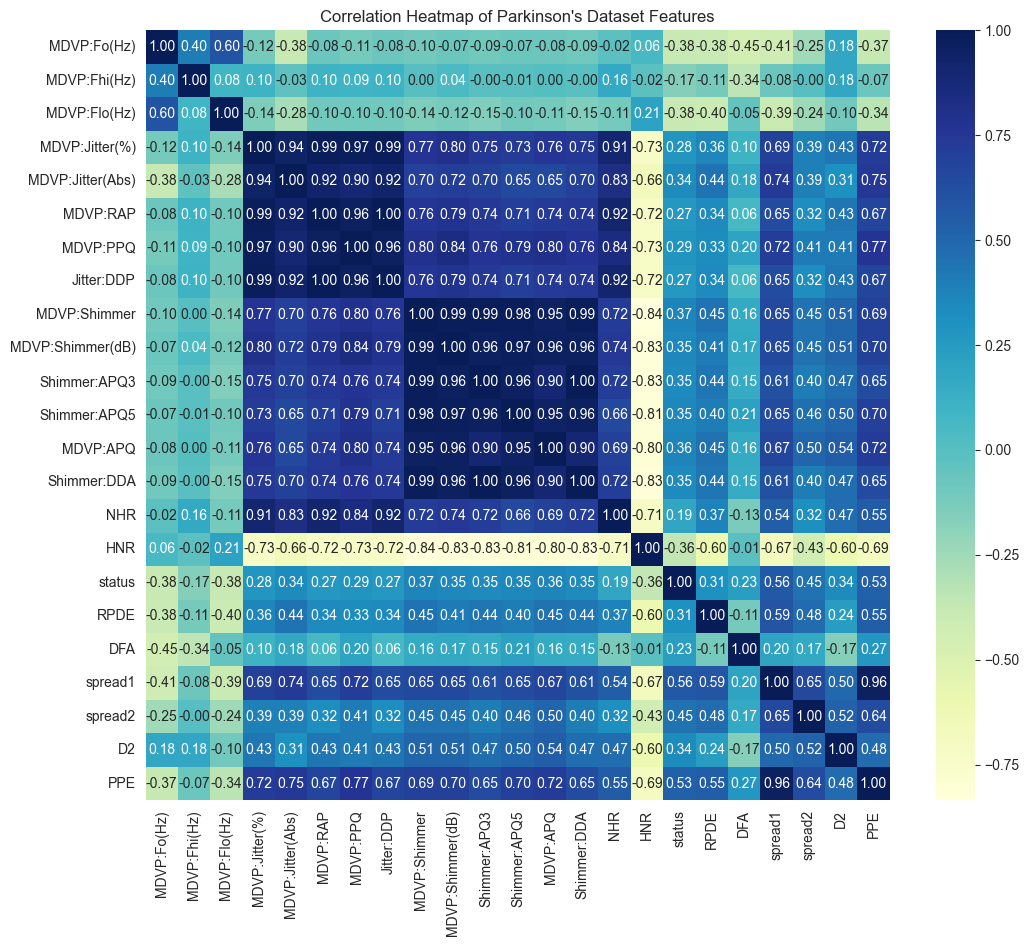

In [65]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f",cmap="YlGnBu")
plt.title('Correlation Heatmap of Parkinson\'s Dataset Features')
plt.show()

##Inferences from the correlation heat map:
The darkest shows positive correaltion will the lighest shows negative correaltion.


1.   spread1 as a feature is has the highest (+ve) correlation 0.564838

2.   MDVP:Fo(Hz) as a feature has the highest (-ve) correlation -0.383535



##Outliers

In [66]:
import pandas as pd

# Define a function to list outliers for each feature
def list_outliers(df):

    # Create an empty list to store outlier counts
    outlier_counts = []

    # Find and print outliers for each feature
    for column in df.columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Find outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

        # Count outliers and add to the list
        outlier_counts.append({'Feature': column, 'Outlier Count': outliers.shape[0]})

    # Convert the list to a DataFrame
    outlier_counts_df = pd.DataFrame(outlier_counts)

    # Print outlier counts in tabular format
    print(outlier_counts_df)

# Call the function with your dataset
list_outliers(parkinson_dataset)


             Feature  Outlier Count
0        MDVP:Fo(Hz)              0
1       MDVP:Fhi(Hz)             11
2       MDVP:Flo(Hz)              9
3     MDVP:Jitter(%)             14
4   MDVP:Jitter(Abs)              7
5           MDVP:RAP             14
6           MDVP:PPQ             15
7         Jitter:DDP             14
8       MDVP:Shimmer              8
9   MDVP:Shimmer(dB)             10
10      Shimmer:APQ3              6
11      Shimmer:APQ5             13
12          MDVP:APQ             12
13       Shimmer:DDA              6
14               NHR             19
15               HNR              3
16            status             48
17              RPDE              0
18               DFA              0
19           spread1              4
20           spread2              2
21                D2              1
22               PPE              5


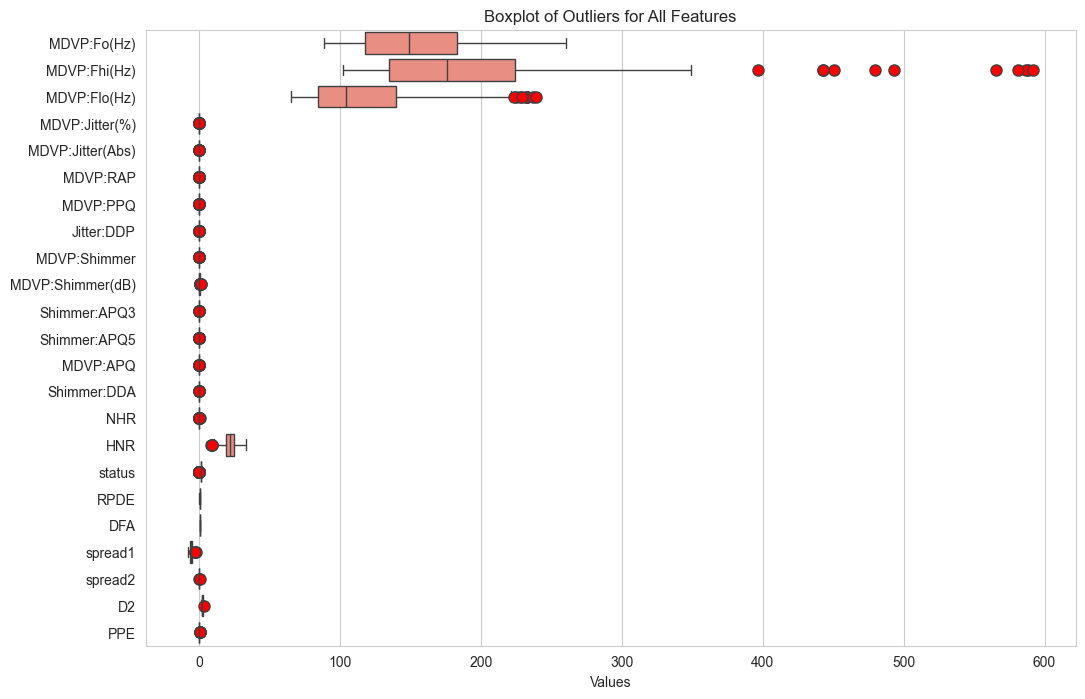

In [67]:
# Set the style
sns.set_style("whitegrid")

# Plot boxplots for all features
plt.figure(figsize=(12, 8))
sns.boxplot(data=parkinson_dataset, orient="h", color='salmon', flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Boxplot of Outliers for All Features')
plt.xlabel('Values')
plt.show()


In [68]:
def remove_outliers_except(df, exceptions):
    cleaned_df = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly

    # Iterate over columns and remove outliers, except for specified columns
    for column in df.columns:
        if column not in exceptions and df[column].dtype != 'object':  # Exclude specified columns and non-numeric columns
            Q1 = cleaned_df[column].quantile(0.25)
            Q3 = cleaned_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove outliers
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

# Specify exceptions
exceptions = ['MDVP:Fo(Hz)', 'RPDE', 'DFA']

# Call the function with your dataset
parkinson_dataset_cleaned = remove_outliers_except(parkinson_dataset, exceptions)
print(parkinson_dataset_cleaned.shape)


(125, 23)


### separating the data and labels

In [69]:

X = parkinson_dataset_cleaned.drop(columns = ['status'], axis=1)
Y = parkinson_dataset_cleaned['status']

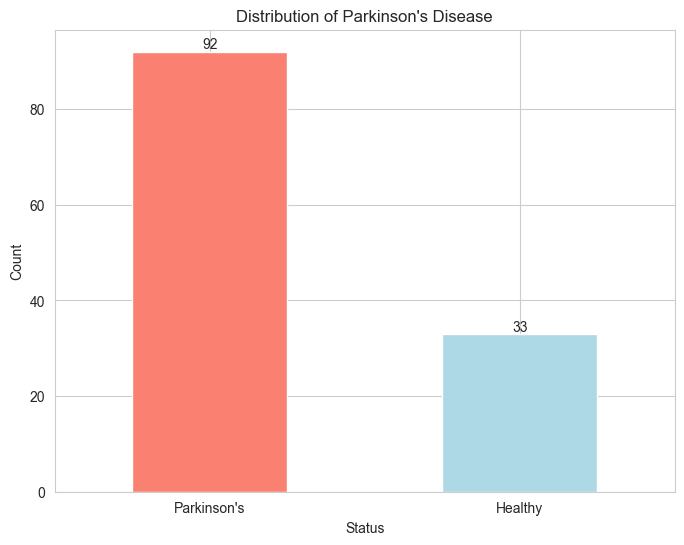

In [70]:
#bar chart of status
Y_counts = Y.value_counts().rename({1: "Parkinson's", 0: "Healthy"})

# Plotting the bar plot with labeled bars and counts
ax = Y_counts.plot(kind='bar', figsize=(8, 6), color=["salmon", "lightblue"])
for i, count in enumerate(Y_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Parkinson\'s Disease')
plt.xticks(rotation=0)
plt.show()


In [71]:
Y.value_counts()

status
1    92
0    33
Name: count, dtype: int64

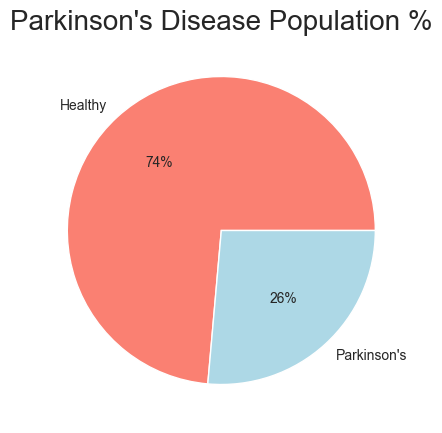

In [72]:
# Calculate % of the count of each class in the 'status' column
parkinsons_count = Y.value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 5))
plt.pie(parkinsons_count, labels=['Healthy', 'Parkinson\'s'], colors=['salmon', 'lightblue'], autopct='%0.0f%%')
plt.title('Parkinson\'s Disease Population %', fontsize=20)
plt.show()


In [73]:
#mean of each feature for patients with and without parkinsons
parkinson_dataset_cleaned.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,167.793212,185.740212,136.87403,0.003592,0.000024,0.001725,0.001914,0.005177,0.017482,0.159424,...,0.013478,0.028025,0.006339,25.520333,0.442790,0.715401,-6.698805,0.172583,2.109690,0.12944
1,144.009446,169.119076,109.94538,0.004943,0.000037,0.002566,0.002760,0.007699,0.024091,0.222370,...,0.019516,0.038112,0.012361,22.719978,0.490268,0.730830,-5.781881,0.217477,2.306973,0.19865


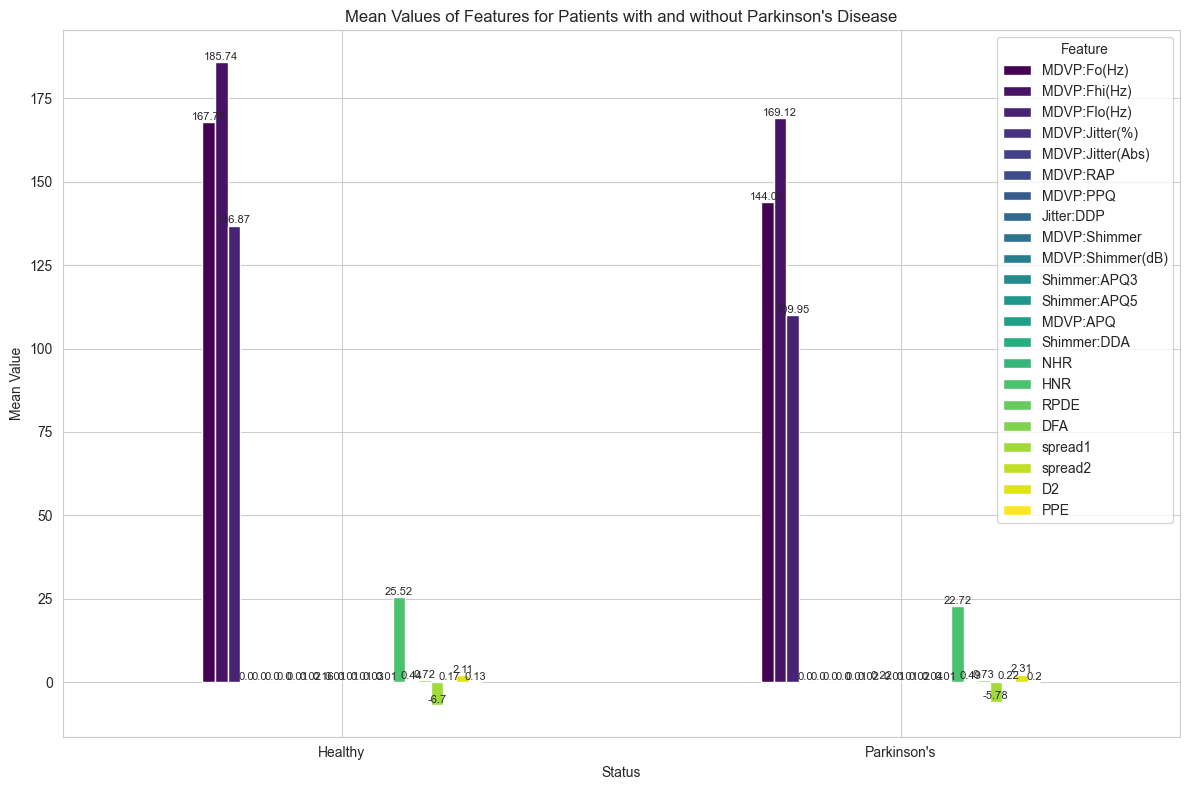

In [74]:
# Grouping by 'status' and calculating the mean for each feature
mean_by_status = parkinson_dataset_cleaned.groupby('status').mean()

# Plotting the mean values for each feature
ax = mean_by_status.plot(kind='bar', figsize=(12, 8), cmap='viridis')

# Loop through each bar in the plot
for bar in ax.patches:
    # Calculate the x-coordinate for the text (center of the bar)
    text_x = bar.get_x() + bar.get_width() / 2
    # Calculate the y-coordinate for the text (above the top of the bar, slightly)
    text_y = bar.get_height() + 0.02
    # Retrieve the height of the bar (mean value of the feature)
    bar_height = round(bar.get_height(), 2)
    # Add the text at the calculated position
    ax.text(text_x, text_y, bar_height, ha='center', va='bottom', fontsize=8)
# Adding title and labels to axes
plt.title('Mean Values of Features for Patients with and without Parkinson\'s Disease')
plt.xlabel('Status')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'], rotation=0)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

##Train Test Split

In [75]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y,random_state=42)

In [76]:
print(X.shape, X_train.shape, X_test.shape)

(125, 22) (100, 22) (25, 22)


In [77]:
#Train logistic model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
Y_pred1 = model1.predict(X_test)
Y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [79]:
input_data = [[197,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.08556]]
prediction=model1.predict(input_data)
if (prediction[0] == 0):
  print("The person does not parkinson's disease")
else:
  print("The person has parkinson's disease")


The person does not parkinson's disease


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [80]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 79.00%


In [81]:
# accuracy score on the test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 80.00%


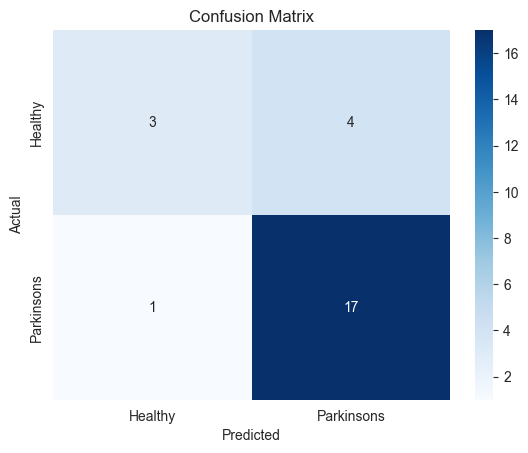

In [82]:
cm = metrics.confusion_matrix(Y_test, Y_pred1)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [83]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.81      0.94      0.87        18

    accuracy                           0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25



### SVM

In [84]:
#Train SVM model
from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(X_train,Y_train)

SVC(kernel='linear')

In [85]:
Y_pred2 = model2.predict(X_test)
Y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [86]:
input_data = [[197,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.08556]]
prediction=model2.predict(input_data)
if (prediction[0] == 0):
  print("The person does not parkinson's disease")
else:
  print("The person has parkinson's disease")


The person does not parkinson's disease


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [87]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 83.00%


In [88]:
# accuracy score on the test data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 84.00%


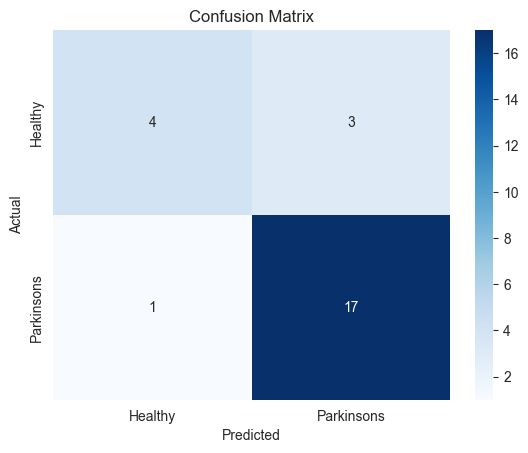

In [89]:
cm = metrics.confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [90]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.85      0.94      0.89        18

    accuracy                           0.84        25
   macro avg       0.82      0.76      0.78        25
weighted avg       0.84      0.84      0.83        25



### KNN

In [91]:
k_values = np.arange(1, 22,2)  # Example range: from 1 to 20
print(k_values)
# Define an empty list to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each k value
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)  # 5-fold cross-validation
    print(scores)
    cv_scores.append(scores.mean())

[ 1  3  5  7  9 11 13 15 17 19 21]
[0.85 0.9  0.85 0.85 0.7 ]
[0.85 0.7  0.85 0.7  0.75]
[0.8  0.7  0.9  0.65 0.65]
[0.8  0.85 0.8  0.7  0.7 ]
[0.65 0.8  0.8  0.65 0.7 ]
[0.7  0.75 0.75 0.75 0.7 ]
[0.7  0.7  0.75 0.8  0.7 ]
[0.7  0.75 0.75 0.75 0.75]
[0.7  0.75 0.75 0.75 0.75]
[0.7  0.75 0.75 0.7  0.75]
[0.7  0.75 0.75 0.75 0.75]


In [92]:
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal value of k:", optimal_k)

Optimal value of k: 1


In [93]:
# Train KNN model
model3= KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski',p=2)
model3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
Y_pred3 = model3.predict(X_test)
Y_pred3

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0], dtype=int64)

In [95]:
input_data = [[197,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.08556]]
prediction=model3.predict(input_data)
if (prediction[0] == 0):
  print("The person does not parkinson's disease")
else:
  print("The person has parkinson's disease")


The person does not parkinson's disease


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [96]:
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 100.00%


In [97]:
# accuracy score on the test data
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 80.00%


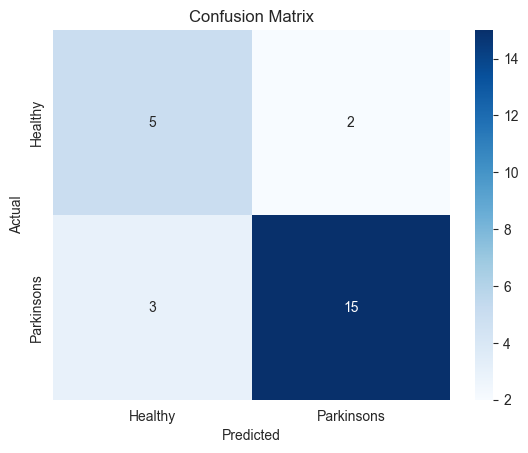

In [98]:
cm = metrics.confusion_matrix(Y_test, Y_pred3)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [99]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.88      0.83      0.86        18

    accuracy                           0.80        25
   macro avg       0.75      0.77      0.76        25
weighted avg       0.81      0.80      0.80        25



### Random Forest

In [100]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': range(3,12),
	'max_leaf_nodes': range(3,12),
}

In [101]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_)

KeyboardInterrupt: 

In [ ]:
randomized_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, Y_train)
print(randomized_search.best_estimator_)

In [ ]:
# Train Random Forest model
model4= RandomForestClassifier(n_estimators= 150,max_features='log2', max_leaf_nodes=11,max_depth=3, criterion="gini")
model4.fit(X_train, Y_train)

In [ ]:
Y_pred4 = model4.predict(X_test)
Y_pred4

In [ ]:
input_data = [[197,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.08556]]
prediction=model4.predict(input_data)
if (prediction[0] == 0):
  print("The person does not parkinson's disease")
else:
  print("The person has parkinson's disease")


In [ ]:
X_train_prediction = model4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model4.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_pred4)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test, X_test_prediction))

### Gradient Boosting

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model5, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Create a Gradient Boosting classifier with default 'deviance' loss
model5 = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=200,ccp_alpha=0.0)

# Train the model with training data
model5.fit(X_train, Y_train)

In [ ]:
Y_pred5 = model5.predict(X_test)
Y_pred5

In [ ]:
input_data = [[197,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.08556]]
prediction=model5.predict(input_data)
if (prediction[0] == 0):
  print("The person does not parkinson's disease")
else:
  print("The person has parkinson's disease")


In [ ]:
X_train_prediction = model5.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model5.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_pred5)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test, X_test_prediction))

### XG Boosting

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]

}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model6, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
model6 = xgb.XGBClassifier(learning_rate= 1,max_depth= 3,n_estimators=50)
# Train the model with training data
model6.fit(X_train, Y_train)

In [ ]:
Y_pred6 = model6.predict(X_test)
Y_pred6

In [ ]:
input_data = [[197,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.08556]]
prediction=model6.predict(input_data)
if (prediction[0] == 0):
  print("The person does not parkinson's disease")
else:
  print("The person has parkinson's disease")


In [ ]:
X_train_prediction = model6.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model6.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_pred6)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test, X_test_prediction))

In [ ]:
model7 = AdaBoostClassifier(n_estimators=100,learning_rate=1)
# Train the model with training data
model7.fit(X_train, Y_train)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model7, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
Y_pred7 = model7.predict(X_test)
Y_pred7

In [ ]:
X_train_prediction = model7.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
input_data = [[197,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.08556]]
prediction=model7.predict(input_data)
if (prediction[0] == 0):
  print("The person does not parkinson's disease")
else:
  print("The person has parkinson's disease")


In [ ]:
# accuracy score on the test data
X_test_prediction = model7.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_pred7)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Healthy', 'Parkinsons'],
            yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# filename = 'Parkinson_model.sav'
#taking Random forest model
pickle.dump(model5, open('Parkinson_model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('Parkinson_model.pkl', 'rb'))